# CORRELATION STUDY OF TIME SERIES DATA
                                                                                           Alperen Koksal

For about two or three years the most important topic has became the economy in Turkey. Economy plays the most important role in shaping our lives. It affects one's daily life, welfare and living standarts. Today, there is a wide range of factors that affect the economy, probably much more than known factors. Most poular ones are exchange rates, gold prices interest rates, inflation and housing prices.Purpose of this study is finding whether there is a relation between interest rates, exchange rate for dollars and gold prices or not. Also we are pursuing to determine the degree of relation between those properties of economy.

First, Reading and Manipulating our data to create the time series data

In [48]:
library(data.table,quietly = TRUE,warn.conflicts = FALSE)
library(ggplot2,quietly = TRUE,warn.conflicts = FALSE)
library(zoo,quietly = TRUE,warn.conflicts = FALSE)
library(lubridate,quietly = TRUE,warn.conflicts = FALSE)


In [49]:
setwd("C:/Users/a_kok/Desktop/Dersler/IE 360/HW2")
interest_rates <- fread("interestrates.csv", nrows = 95)
dollarpertl <- fread("dollarpertl.csv",nrows = 95)
goldprices <- fread("goldprices.csv",nrows = 95)


In [50]:

datamanipulation <- function(x,data){
    setnames(data,colnames(data[,2]),"Values")
    data[,1 := as.Date(paste(Tarih,"-01",sep="",format = "%Y-%m-%d"))]
    data <- na.omit(data)
    data[,2 := gsub(",",".",Values)]
    data[,2 := as.numeric(Values)]
    data[,timestamp:=ymd(paste(Tarih,sep = "-"))]
    setnames(data,colnames(data[,2]),x)
    
}


datamanipulation("interestrates",interest_rates)
datamanipulation("Goldprices",goldprices)
datamanipulation("Dollarpertl",dollarpertl)

Analyzing time series data one by one 

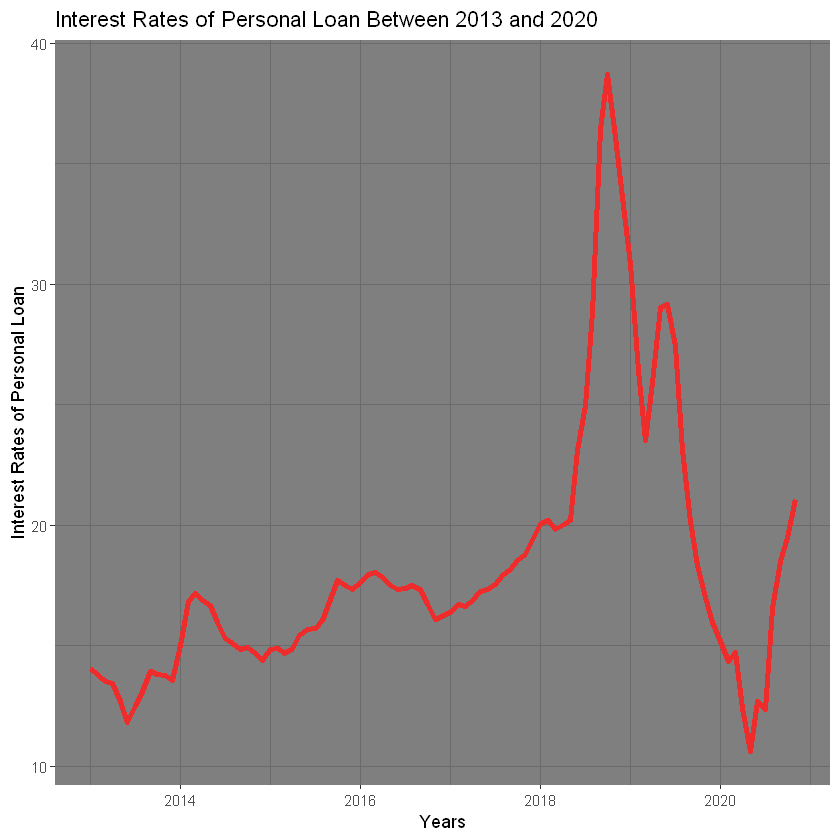

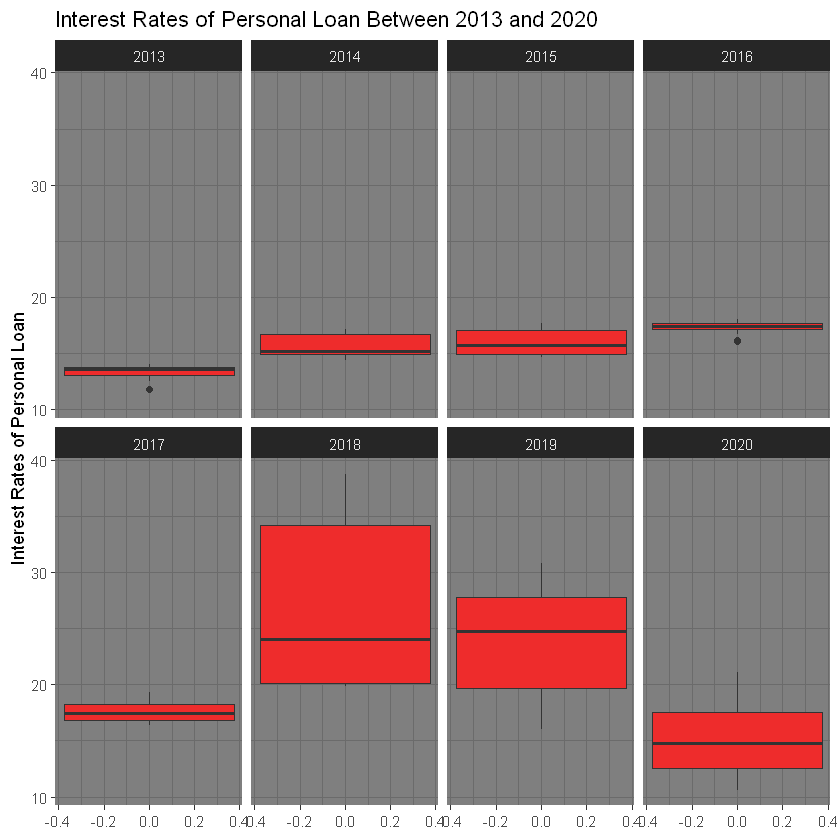

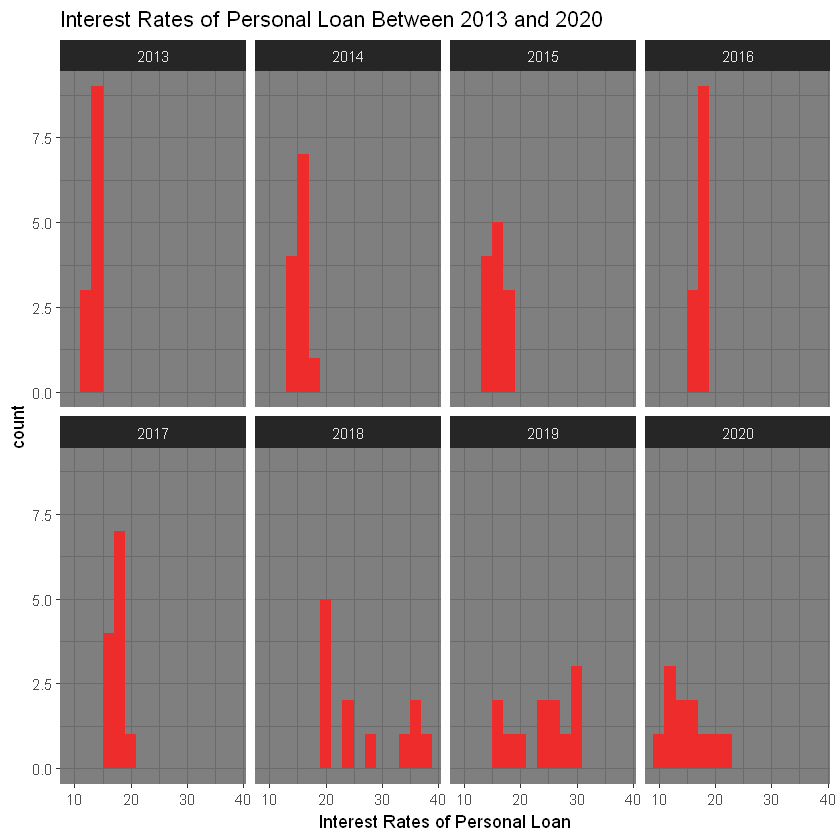

In [51]:
ggplot(data = interest_rates, aes(x=timestamp, y=interestrates)) + geom_line(colour = "firebrick2",size = 1.5) +
labs( x = "Years", y = "Interest Rates of Personal Loan",title ="Interest Rates of Personal Loan Between 2013 and 2020") + theme_dark()
ggplot(data = interest_rates, aes(,y=interestrates)) + geom_boxplot(fill = "firebrick2") + facet_wrap(interest_rates[,year(Tarih)],nrow = 2) + 
labs(y = "Interest Rates of Personal Loan",title ="Interest Rates of Personal Loan Between 2013 and 2020") + theme_dark()
ggplot(data = interest_rates, aes(x=interestrates,)) + geom_histogram(binwidth = 2,fill = "firebrick2") + facet_wrap(interest_rates[,year(Tarih)],nrow = 2) + 
labs(x = "Interest Rates of Personal Loan",title ="Interest Rates of Personal Loan Between 2013 and 2020") + theme_dark()

As we see from the plots, 2014 to 2018 interest rates are in between %10 and %20. It has increased significantly almost doubling itself between 2018 and 2019. It has a local minimum in 2020 and nowadays it is increasing continously. Interest rates are controlled by the government to deal with the economic problems and factors.

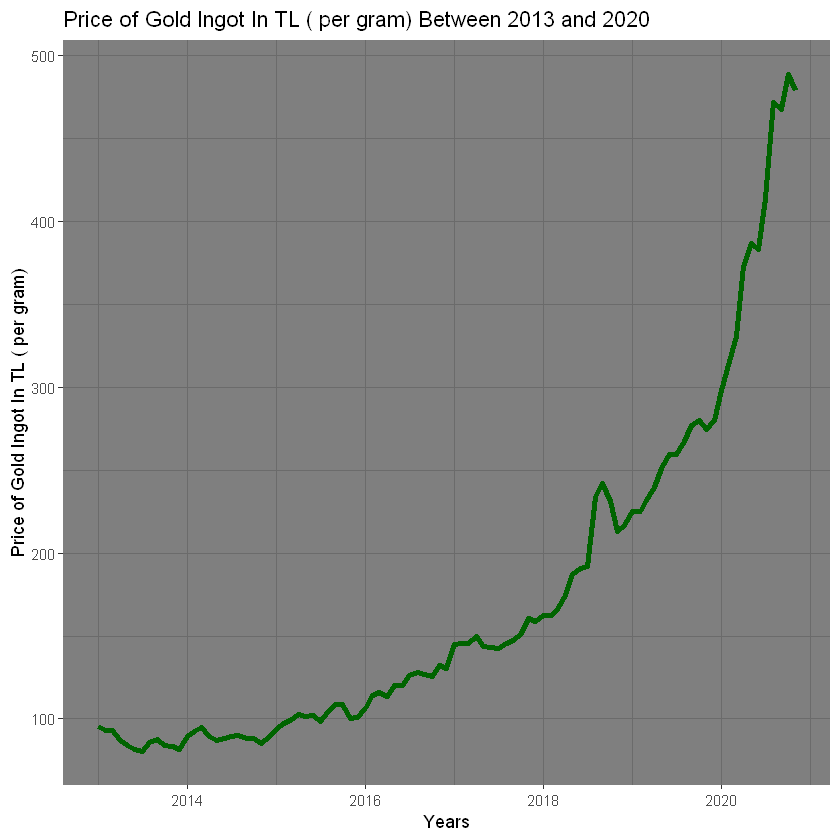

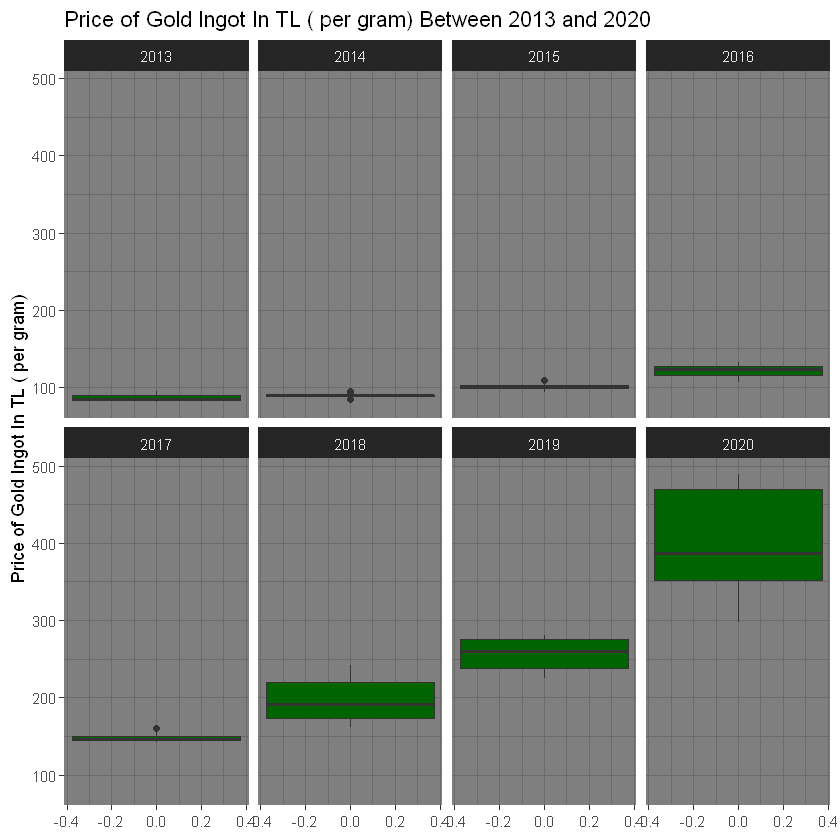

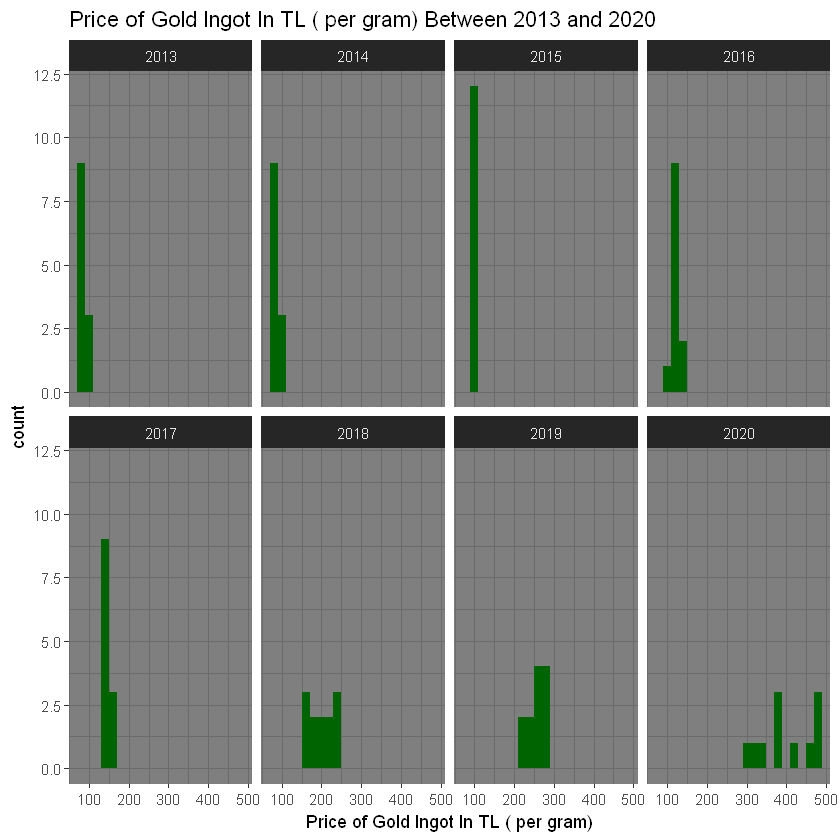

In [52]:
ggplot(data = goldprices, aes(x=timestamp, y=Goldprices)) + geom_line(colour = "darkgreen",size = 1.5) +
labs( x = "Years", y = "Price of Gold Ingot In TL ( per gram)",title ="Price of Gold Ingot In TL ( per gram) Between 2013 and 2020") + theme_dark()
ggplot(data = goldprices, aes(,y=Goldprices)) + geom_boxplot(fill = "darkgreen") + facet_wrap(goldprices[,year(Tarih)],nrow = 2) +
labs( y = "Price of Gold Ingot In TL ( per gram)",title ="Price of Gold Ingot In TL ( per gram) Between 2013 and 2020") + theme_dark()
ggplot(data = goldprices, aes(x=Goldprices,)) + geom_histogram(binwidth = 20,fill = "darkgreen") + facet_wrap(interest_rates[,year(Tarih)],nrow = 2)+
labs( x = "Price of Gold Ingot In TL ( per gram)",title ="Price of Gold Ingot In TL ( per gram) Between 2013 and 2020") + theme_dark()


When we analyze the plot we see that despite some decreases gold ingot price increases from 100 Turkish Liras per to 500 Turkish Liras. There are several factors affecting gold ingot price

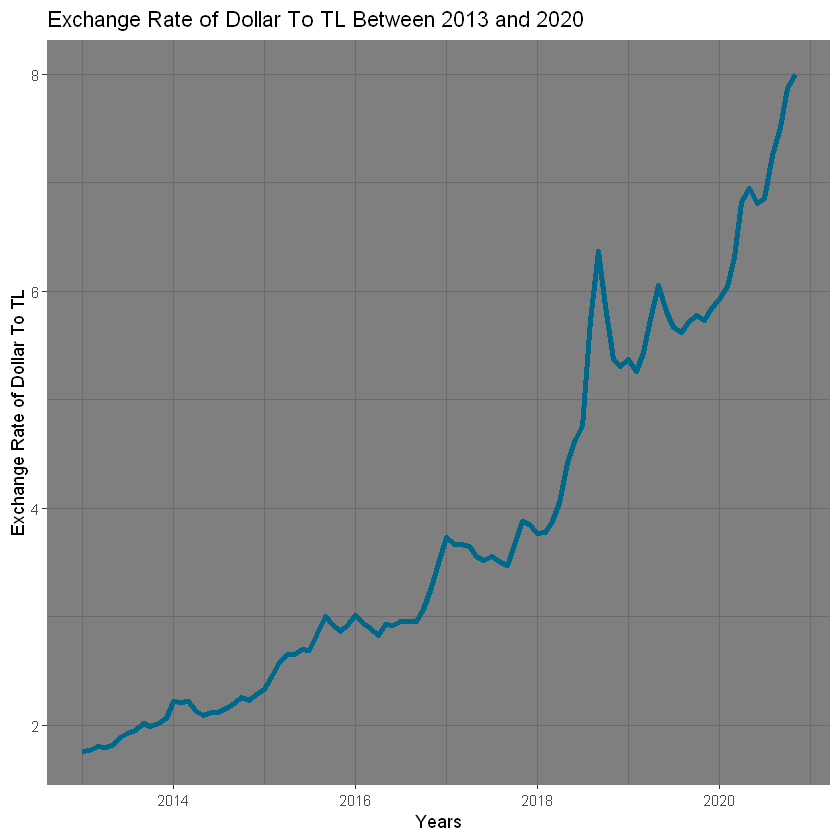

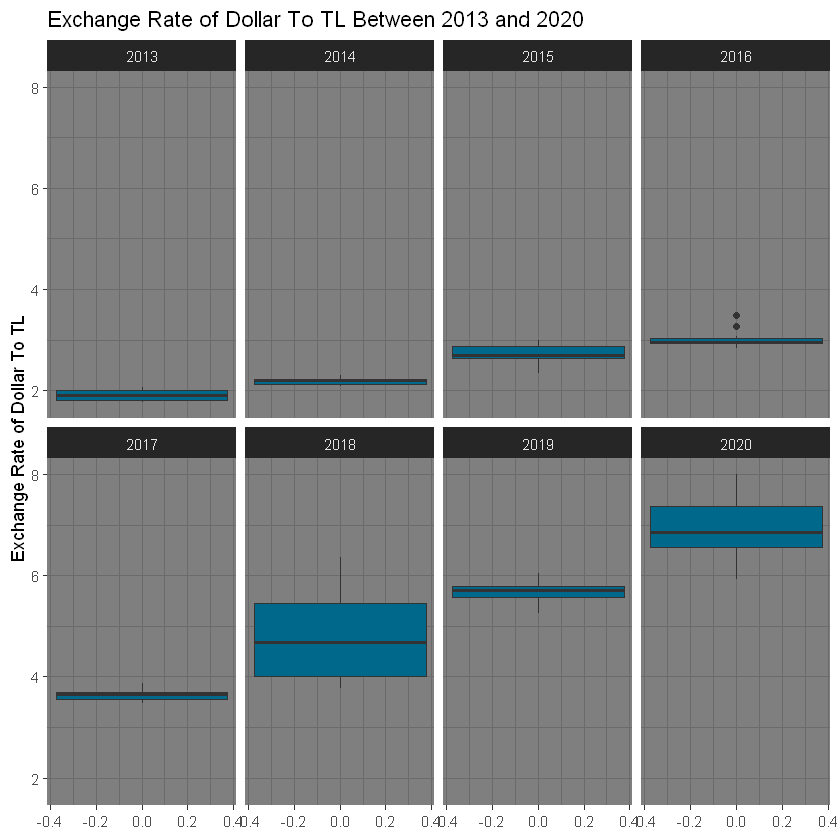

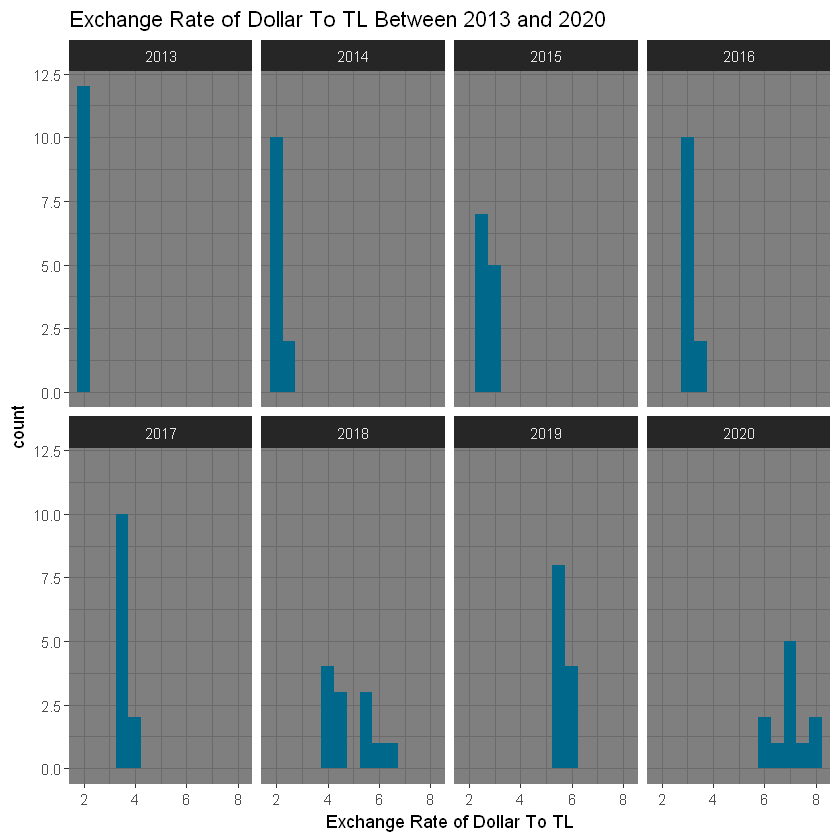

In [53]:
ggplot(data = dollarpertl, aes(x=timestamp, y=Dollarpertl)) + geom_line(colour = "deepskyblue4",size = 1.5) +
labs( x = "Years", y = "Exchange Rate of Dollar To TL",title ="Exchange Rate of Dollar To TL Between 2013 and 2020") + theme_dark()
ggplot(data = dollarpertl, aes(,y=Dollarpertl)) + geom_boxplot(fill = "deepskyblue4") + facet_wrap(dollarpertl[,year(Tarih)],nrow = 2) +
labs(y = "Exchange Rate of Dollar To TL",title ="Exchange Rate of Dollar To TL Between 2013 and 2020") + theme_dark()
ggplot(data = dollarpertl, aes(x=Dollarpertl,)) + geom_histogram(binwidth = 0.5, fill = "deepskyblue4") + facet_wrap(interest_rates[,year(Tarih)],nrow = 2) +
labs(x = "Exchange Rate of Dollar To TL",title ="Exchange Rate of Dollar To TL Between 2013 and 2020") + theme_dark()


As we analyze the plots, we see that despite some decreases Exchange rate of dollar to Turkish Liras increases from 2 to 8. There are also several economical and political factors that affects the exchange rate.


	Pearson's product-moment correlation

data:  interest_rates[, interestrates] and dollarpertl[, Dollarpertl]
t = 5.0539, df = 93, p-value = 2.158e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2897461 0.6087732
sample estimates:
      cor 
0.4641826 


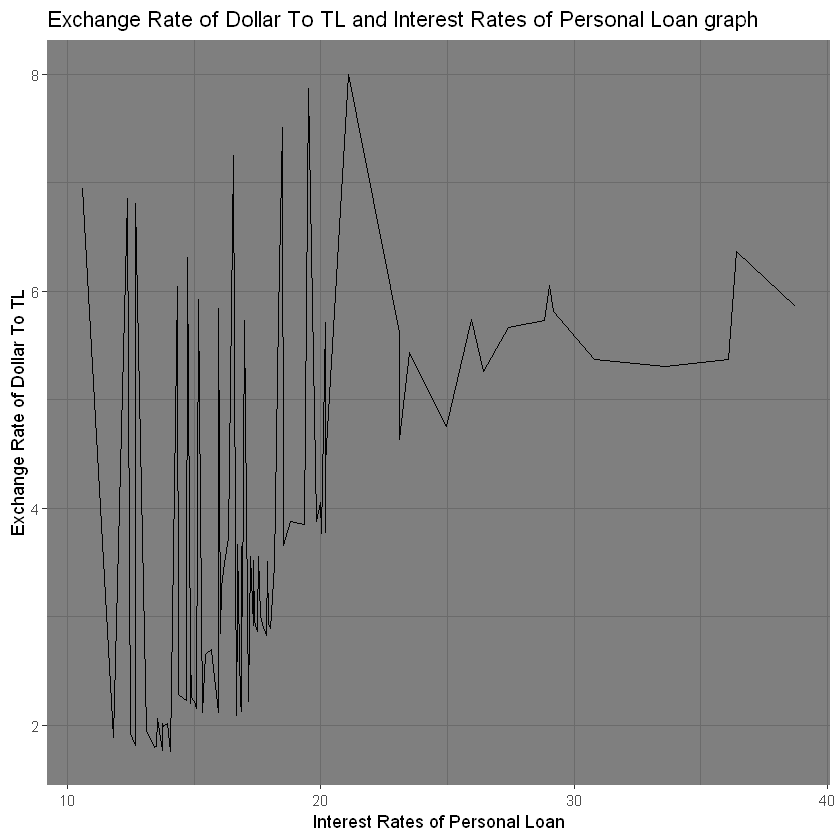

In [54]:
combineddata <- data.table(interestrates = interest_rates[,interestrates],Goldprices = goldprices[,Goldprices], Dollarpertl = dollarpertl[,Dollarpertl])
ggplot(combineddata, aes(x = interestrates,y = Dollarpertl)) + geom_line() +
labs(x = "Interest Rates of Personal Loan",y = "Exchange Rate of Dollar To TL" ,title ="Exchange Rate of Dollar To TL and Interest Rates of Personal Loan graph" ) + theme_dark()
cor.test(interest_rates[,interestrates],dollarpertl[,Dollarpertl])



The p value of correlation between interest rates and exchange rate of dollar to tl is significantly low so we can say that there is a strong correlation. correlation coefficent r = 0.4642. It means that interest rate and dollar per tl is more likely increasing together and decreasing together than going opposite directions. In the beginning of my research question , I thought that interest rate and exchange rate should have negative correlation based on my knowledge. But in correlation analysis we saw that it is not a correct.


	Pearson's product-moment correlation

data:  interest_rates[, interestrates] and goldprices[, Goldprices]
t = 2.5983, df = 93, p-value = 0.01089
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06184926 0.43869128
sample estimates:
      cor 
0.2601494 


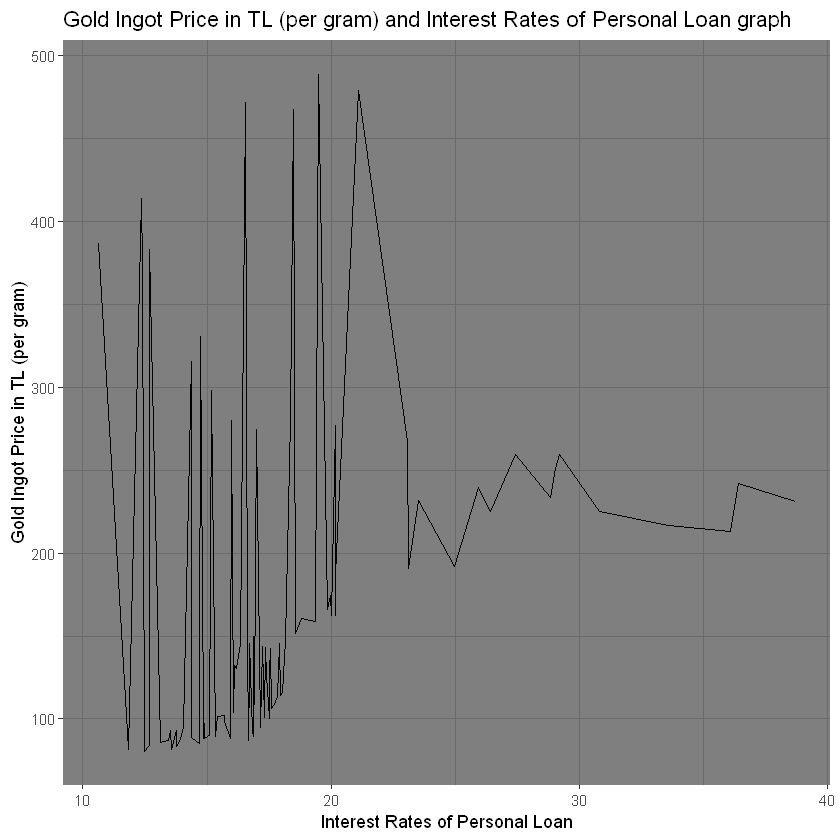

In [55]:
cor.test(interest_rates[,interestrates],goldprices[,Goldprices])
ggplot(combineddata, aes(x = interestrates,y = Goldprices)) + geom_line() +
labs(x = "Interest Rates of Personal Loan",y = "Gold Ingot Price in TL (per gram)" ,title ="Gold Ingot Price in TL (per gram) and Interest Rates of Personal Loan graph" ) + theme_dark()


The p value of correlation between interest rates and gold price is low so we can say that there is a correlation. correlation coefficent r = 0.2601. It means that gold price and dollar per tl is more likely increasing together and decreasing together than going opposite directions. This r value is lower and p value is bigger than the correlation test between interest rates and exchange rate means that this correlation is weaker. In the beginning of my research question , I thought that gold price and exchange rate should have negative correlation based on my knowledge. But in correlation analysis we saw that it is not correct.


	Pearson's product-moment correlation

data:  dollarpertl[, Dollarpertl] and goldprices[, Goldprices]
t = 32.739, df = 93, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9393034 0.9727346
sample estimates:
      cor 
0.9592507 


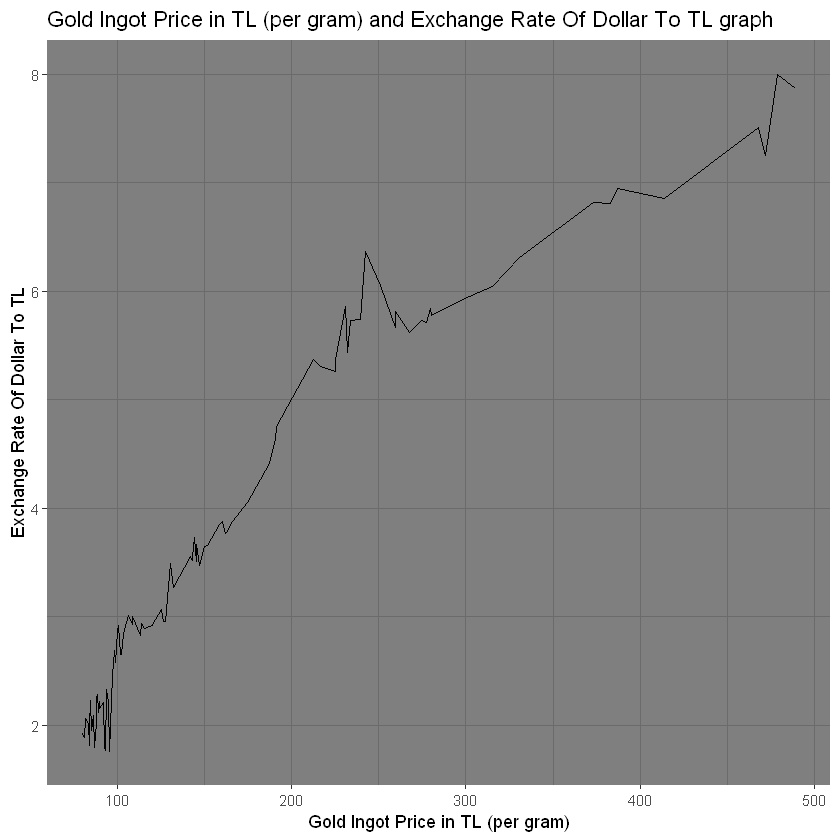

In [56]:
cor.test(dollarpertl[,Dollarpertl],goldprices[,Goldprices])
ggplot(combineddata, aes(x = Goldprices,y = Dollarpertl)) + geom_line() +
labs(x = "Gold Ingot Price in TL (per gram)",y = "Exchange Rate Of Dollar To TL" ,title ="Gold Ingot Price in TL (per gram) and Exchange Rate Of Dollar To TL graph" ) + theme_dark()

Finally, as we expected the correlation between gold price and exchange rate of dollar to tl is strongest. The p value of correlation test is significantly low and correlation efficient r = 0.9593 meaning that gold price and dollar per tl almost have the perfect correlation. In other words both values are changing in the same direction almost in the same pattern

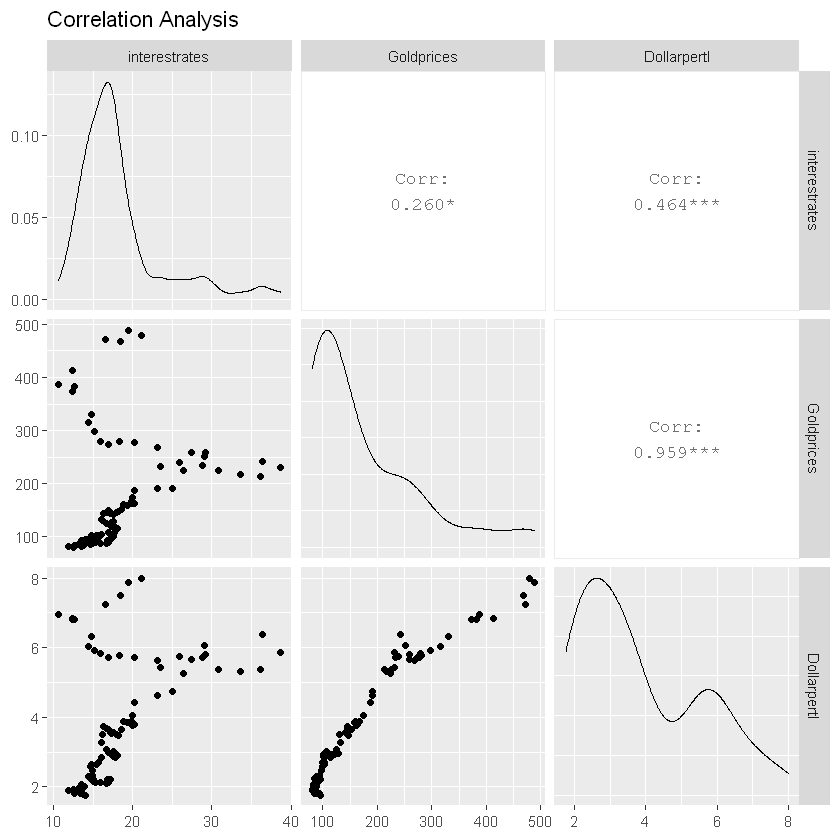

In [57]:
GGally::ggpairs(combineddata,title = "Correlation Analysis")

also from the scatter plot matrrix we can see the degrees and coefficients of correlation

In [58]:
combineddata[,timestamp:= interest_rates[,timestamp]]
interestrates_Goldprices <- combineddata[,cor(interestrates,Goldprices),by = year(timestamp)]
interestrates_Dollarpertl <- combineddata[,cor(interestrates,Dollarpertl),by = year(timestamp)]
Dollarpertl_Goldprices <- combineddata[,cor(Dollarpertl,Goldprices),by = year(timestamp)]

In [59]:
interestrates_Goldprices


year,V1
<dbl>,<dbl>
2013,0.6077016
2014,0.5355386
2015,0.6049279
2016,-0.7481802
2017,0.7438385
2018,0.8927749
2019,-0.7244611
2020,0.6159555


From the yearly correlation values of interest rates and gold ingot price we see that in some years we observe negative correlation but mostly positive correlation. To find the reasons of these negative correlations we need to analyze especially these years.

In [60]:
interestrates_Dollarpertl


year,V1
<dbl>,<dbl>
2013,0.06448581
2014,-0.48734451
2015,0.86368973
2016,-0.88686635
2017,0.31695590
2018,0.91230003
2019,-0.21917605
2020,0.63633668


From the yearly correlation values of interest rates and exchange rates of dollar to tl we see that in some years we observe negative correlation but mostly positive correlation. To find the reasons of these negative correlations we need to analyze especially these years.

In [61]:
Dollarpertl_Goldprices

year,V1
<dbl>,<dbl>
2013,-0.6568275
2014,0.1302121
2015,0.8216698
2016,0.5834271
2017,0.7866557
2018,0.9934340
2019,0.6481286
2020,0.9625106


From the yearly correlation values of interest rates and gold ingot price we see that in year 2013 we observe negative correlation but mostly positive correlation. To find the reasons of these negative correlations we need to analyze especially year 2013.